# The Gradient Boosting Algorithm

## Given data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sample X from a normal distribtion
n = 10
location = 10
sd = 3

X = np.random.normal(loc=location, scale=sd, size=n).reshape(-1,1)
X

array([[12.38761338],
       [ 8.99539885],
       [11.58968888],
       [ 6.66928004],
       [13.93877167],
       [ 7.89971976],
       [11.07259151],
       [ 9.46442724],
       [13.62761641],
       [ 9.76992288]])

In [3]:
# Generate target variabel assuming linear additive relationship
intercept = 2  # chosen arbitrarily
beta = 5  # chosen arbitrarily

y = intercept + beta*X + np.random.normal(size=n).reshape(-1,1)
y

array([[63.52247516],
       [46.83251534],
       [60.43098301],
       [33.68174636],
       [72.61098632],
       [42.07904305],
       [59.14896547],
       [49.09414502],
       [69.71129386],
       [50.77285017]])

## Plot

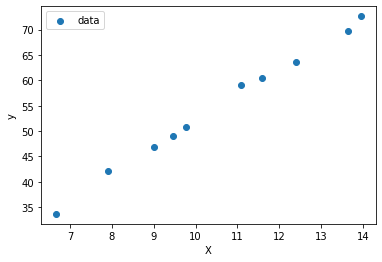

In [4]:
plt.scatter(X, y, label="data")
plt.legend(loc="best")
plt.xlabel('X')
plt.ylabel('y')
plt.show();

## Gradient boosting

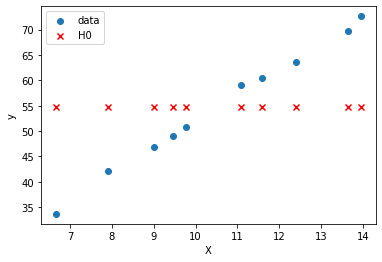

In [5]:
H0 = np.repeat(np.mean(y), X.shape[0]).reshape(-1,1)  # initialize ensemble

# Code from above to plot the data plus the ensemble forecast
plt.scatter(X, y, label="data")
plt.scatter(X, H0, label="H0", c='r', marker='x')
plt.legend(loc="best")
plt.xlabel('X')
plt.ylabel('y')
plt.show();

In [6]:
# calc residuals
e0 = y-H0

print("MSE of H0 is {}".format( np.mean(e0**2 )))

MSE of H0 is 138.63385498724784


### Creating base model 1

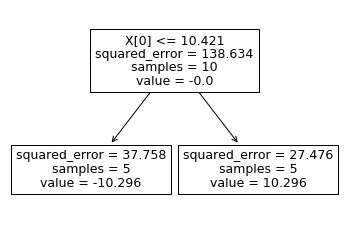

In [7]:
# Train model using (X, e0). Note that we fit the model to the residuals of H0 
from sklearn.tree import DecisionTreeRegressor, plot_tree

tree = DecisionTreeRegressor(max_leaf_nodes=2)  # shallow tree, i.e., stump
tree.fit(X, e0)
plot_tree(tree);

In [8]:
# Calculate base model forecast 
h1 = tree.predict(X).reshape(-1,1)
h1

array([[ 10.29644039],
       [-10.29644039],
       [ 10.29644039],
       [-10.29644039],
       [ 10.29644039],
       [-10.29644039],
       [ 10.29644039],
       [-10.29644039],
       [ 10.29644039],
       [-10.29644039]])

In [9]:
H1 = H0 + h1  # ensemble in step 2

e1 = y - H1  # residuals after step 2
print("MSE of H1 is {}".format( np.mean(e1**2 )))

MSE of H1 is 32.617170364218865


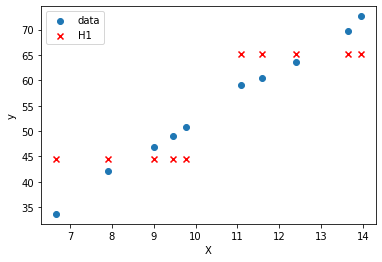

In [10]:
# Code from above to plot the data plus the ensemble forecast
plt.scatter(X, y, label="data")
plt.scatter(X, H1, label="H1", c='r', marker='x')
plt.legend(loc="best")
plt.xlabel('X')
plt.ylabel('y')
plt.show();

### Add second base model

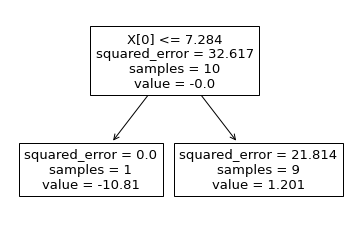

In [11]:
# Fit model 2 to residuals of H1
tree2 = DecisionTreeRegressor(max_leaf_nodes=2)
tree2.fit(X, e1)
plot_tree(tree2);

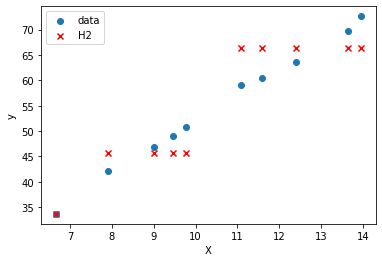

In [12]:
# Update our ensemble
H2 = H1 + tree2.predict(X).reshape(-1, 1)

# Code from above to plot the data plus the ensemble forecast
plt.scatter(X, y, label="data")
plt.scatter(X, H2, label="H2", c='r', marker='x')
plt.legend(loc="best")
plt.xlabel('X')
plt.ylabel('y')
plt.show();

In [13]:
# Note how the error decreases from iteration to iteration
e2 = y - H2  # residual and target for the next iteration
print("MSE of H2 is {}".format( np.mean(e2**2 )))

MSE of H2 is 19.63240583411993
